In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
from psi import calculate_psi
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
import seaborn as sns
from collections import Counter
import numpy as np

import functions_kaskad_binary_models
from functions_kaskad_binary_models import custom_agg
from functions_kaskad_binary_models import list_product 
from functions_kaskad_binary_models import filter_and_check, check_churn, classes_weights
from functions_kaskad_binary_models import plot_importance, binary_model
from functions_kaskad_binary_models import end_segments, start_segments

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip freeze | grep "numpy\|pandas\|lightgbm\|scikit-learn"

lightgbm==3.3.5
numpy==1.21.6
pandas==1.3.5
scikit-learn==1.0.2


## Загрузка данных и предобработка

In [3]:
train_df = pd.read_parquet("train_data.pqt")
test_df = pd.read_parquet("test_data.pqt")

In [4]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year",
]

In [5]:
for cat in cat_cols:
    train_df[cat] = train_df[cat].fillna('missing')
    test_df[cat] = test_df[cat].fillna('missing')
    
train_df['end_cluster'] = train_df['end_cluster'].astype('str')

train_df[cat_cols] = train_df[cat_cols].astype("str")
test_df[cat_cols] = test_df[cat_cols].astype("str")

train_df['end_cluster'] = train_df['end_cluster'].astype('str')        
features = list(set(train_df.drop(["id", "date", "end_cluster"], axis=1).columns))

In [6]:
len(features)

90

## Сначала считаем вероятность оттока по каждому продукту

In [40]:
# alpha

In [41]:
target = 'churn_alpha'

In [42]:
model_alpha_churn, grouped_df = binary_model(train_df, list_product[0], target, features, cat_cols)

date
month_1    0.199861
month_2    0.211246
month_3    0.216462
Name: churn_alpha, dtype: float64
0:	test: 0.7670322	best: 0.7670322 (0)	total: 175ms	remaining: 2m 19s
100:	test: 0.9285306	best: 0.9285306 (100)	total: 15.1s	remaining: 1m 44s
200:	test: 0.9373484	best: 0.9373484 (200)	total: 30.6s	remaining: 1m 31s
300:	test: 0.9398472	best: 0.9398472 (300)	total: 45.4s	remaining: 1m 15s
400:	test: 0.9415107	best: 0.9415157 (398)	total: 1m	remaining: 59.9s
500:	test: 0.9426389	best: 0.9426415 (495)	total: 1m 15s	remaining: 44.8s
600:	test: 0.9436512	best: 0.9436572 (594)	total: 1m 30s	remaining: 29.9s
700:	test: 0.9441161	best: 0.9441173 (697)	total: 1m 45s	remaining: 14.9s
799:	test: 0.9443102	best: 0.9443130 (791)	total: 1m 59s	remaining: 0us

bestTest = 0.9443129755
bestIteration = 791

Shrink model to first 792 iterations.


In [43]:
grouped_df

,date,clients,roc_auc
0,month_1,155443.0,0.973705
1,month_2,161717.0,0.981176
2,month_3,172155.0,0.972315


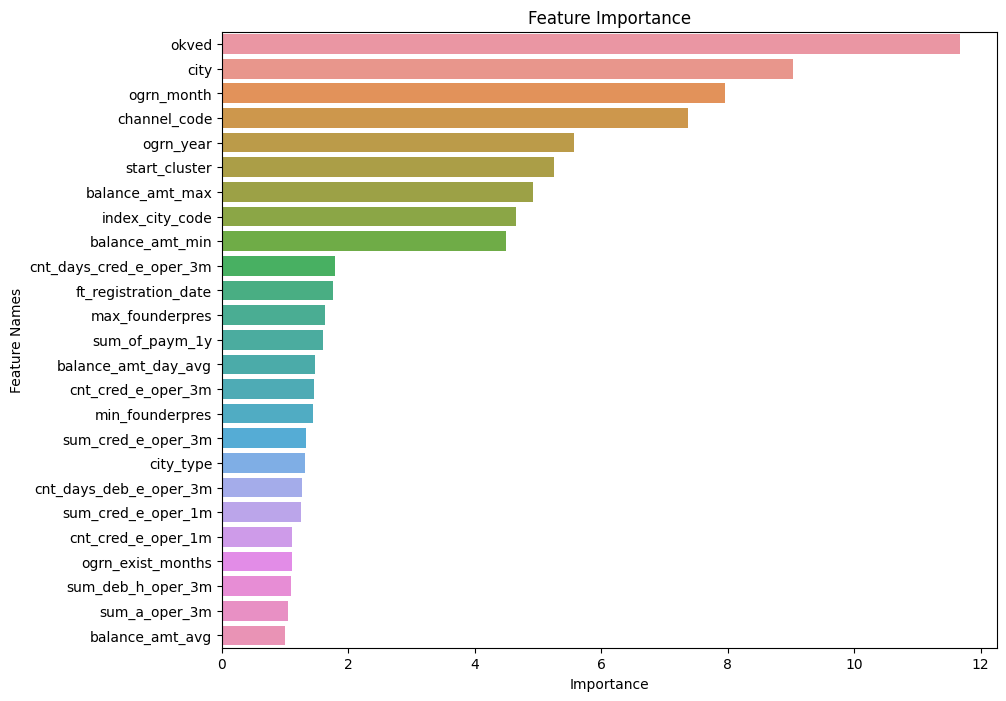

In [44]:
plot_importance(model_alpha_churn)

In [23]:
# beta

In [24]:
target = 'churn_beta'

In [25]:
model_beta_churn, grouped_df = binary_model(train_df, list_product[1], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.513487
month_2    0.507720
month_3    0.514474
Name: churn_beta, dtype: float64
0:	test: 0.6304420	best: 0.6304420 (0)	total: 17.7ms	remaining: 14.2s
100:	test: 0.9335841	best: 0.9336529 (95)	total: 1.02s	remaining: 7.04s
200:	test: 0.9384407	best: 0.9389152 (182)	total: 2.04s	remaining: 6.06s
300:	test: 0.9386759	best: 0.9391360 (241)	total: 2.98s	remaining: 4.93s
400:	test: 0.9388741	best: 0.9392890 (353)	total: 4.04s	remaining: 4.02s
500:	test: 0.9391175	best: 0.9393188 (405)	total: 5.03s	remaining: 3s
600:	test: 0.9387457	best: 0.9394040 (516)	total: 6.07s	remaining: 2.01s
700:	test: 0.9382035	best: 0.9394040 (516)	total: 7.07s	remaining: 998ms
799:	test: 0.9384993	best: 0.9394040 (516)	total: 8.06s	remaining: 0us

bestTest = 0.9394040225
bestIteration = 516

Shrink model to first 517 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


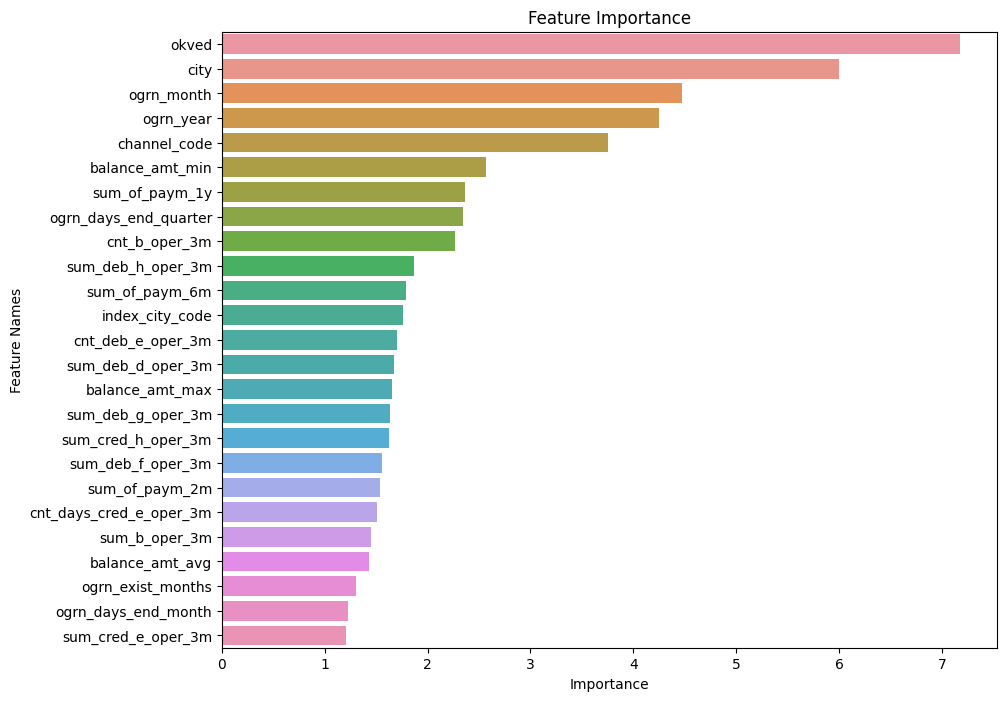

In [26]:
plot_importance(model_beta_churn)

In [27]:
# gamma

In [28]:
target = 'churn_gamma'

In [29]:
model_gamma_churn, grouped_df = binary_model(train_df, list_product[2], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.363696
month_2    0.358157
month_3    0.383422
Name: churn_gamma, dtype: float64
0:	test: 0.6009545	best: 0.6009545 (0)	total: 18ms	remaining: 14.4s
100:	test: 0.9380479	best: 0.9380972 (94)	total: 1.97s	remaining: 13.6s
200:	test: 0.9435663	best: 0.9435663 (200)	total: 3.86s	remaining: 11.5s
300:	test: 0.9448535	best: 0.9448727 (299)	total: 5.7s	remaining: 9.44s
400:	test: 0.9449630	best: 0.9450012 (371)	total: 7.45s	remaining: 7.41s
500:	test: 0.9461523	best: 0.9462167 (496)	total: 9.36s	remaining: 5.58s
600:	test: 0.9466869	best: 0.9467022 (593)	total: 11.3s	remaining: 3.73s
700:	test: 0.9465578	best: 0.9468723 (615)	total: 13.2s	remaining: 1.87s
799:	test: 0.9466056	best: 0.9468723 (615)	total: 15s	remaining: 0us

bestTest = 0.9468722654
bestIteration = 615

Shrink model to first 616 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


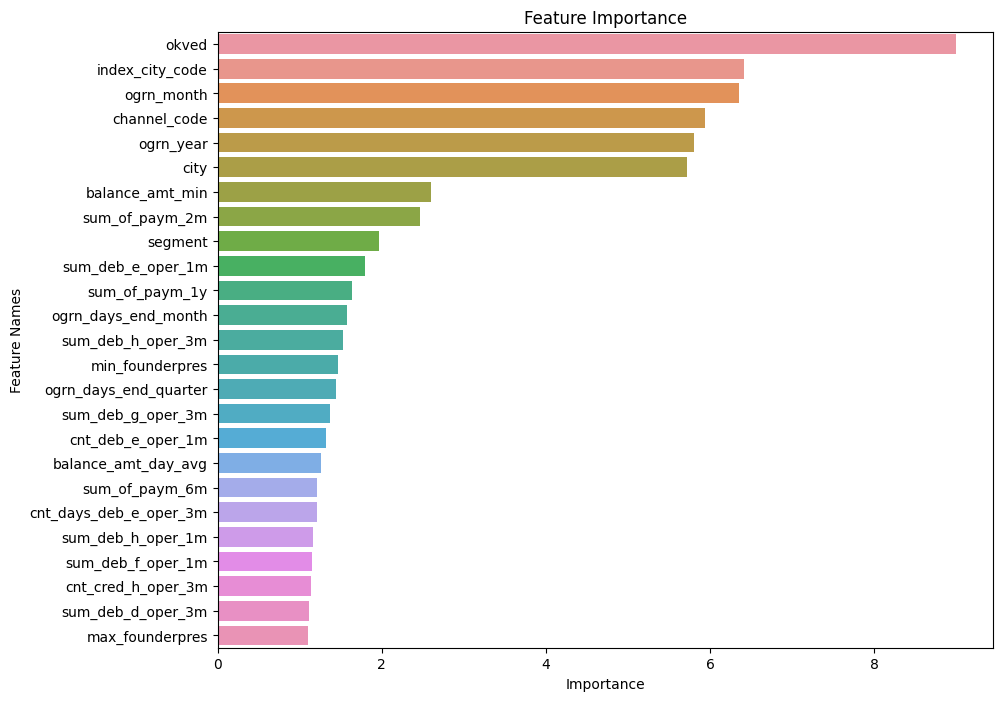

In [30]:
plot_importance(model_gamma_churn)

In [31]:
# sigma

In [32]:
target = 'churn_sigma'

In [33]:
model_sigma_churn, grouped_df = binary_model(train_df, list_product[3], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.810273
month_2    0.786885
month_3    0.768909
Name: churn_sigma, dtype: float64
0:	test: 0.5915224	best: 0.5915224 (0)	total: 8.52ms	remaining: 6.8s
100:	test: 0.9047509	best: 0.9049288 (97)	total: 928ms	remaining: 6.42s
200:	test: 0.9017505	best: 0.9082256 (107)	total: 1.84s	remaining: 5.47s
300:	test: 0.9031777	best: 0.9082256 (107)	total: 2.79s	remaining: 4.62s
400:	test: 0.8994848	best: 0.9082256 (107)	total: 3.67s	remaining: 3.65s
500:	test: 0.8983478	best: 0.9082256 (107)	total: 4.54s	remaining: 2.71s
600:	test: 0.8984388	best: 0.9082256 (107)	total: 5.44s	remaining: 1.8s
700:	test: 0.9010433	best: 0.9082256 (107)	total: 6.32s	remaining: 893ms
799:	test: 0.9008421	best: 0.9082256 (107)	total: 7.24s	remaining: 0us

bestTest = 0.9082256435
bestIteration = 107

Shrink model to first 108 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


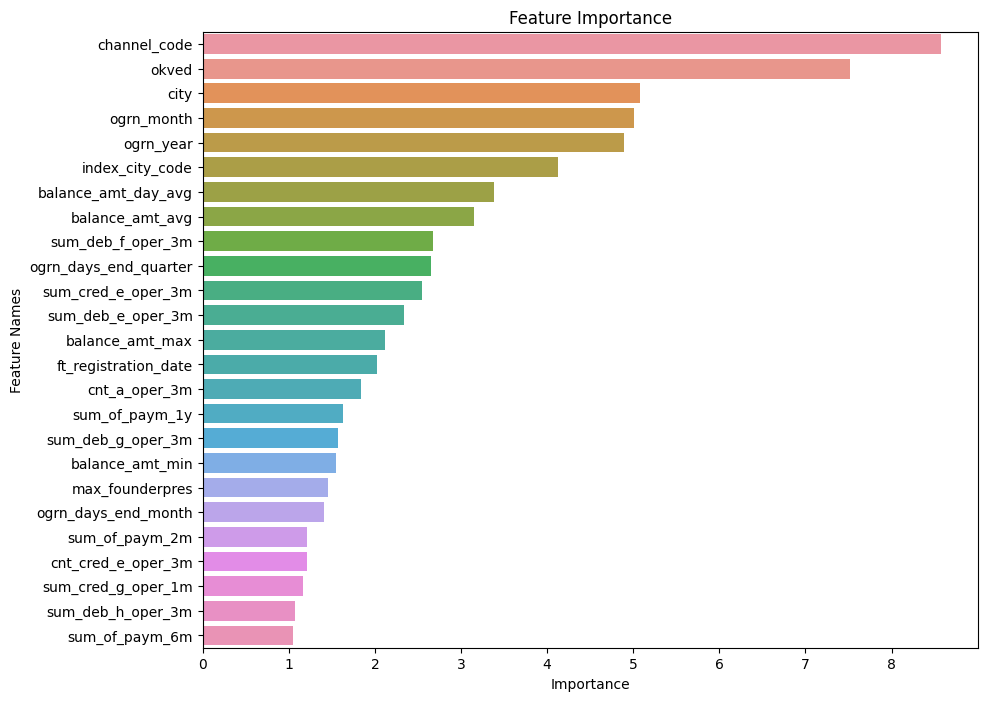

In [34]:
plot_importance(model_sigma_churn)

In [35]:
# epsilon

In [36]:
target = 'churn_epsilon'

In [37]:
model_epsilon_churn, grouped_df = binary_model(train_df, list_product[4], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.542235
month_2    0.533259
month_3    0.552834
Name: churn_epsilon, dtype: float64
0:	test: 0.6330616	best: 0.6330616 (0)	total: 13.3ms	remaining: 10.6s
100:	test: 0.9053486	best: 0.9053486 (100)	total: 971ms	remaining: 6.72s
200:	test: 0.9067909	best: 0.9071958 (172)	total: 1.84s	remaining: 5.49s
300:	test: 0.9076726	best: 0.9076726 (300)	total: 2.78s	remaining: 4.61s
400:	test: 0.9078839	best: 0.9087085 (342)	total: 3.65s	remaining: 3.63s
500:	test: 0.9075127	best: 0.9087085 (342)	total: 4.61s	remaining: 2.75s
600:	test: 0.9070051	best: 0.9087085 (342)	total: 5.5s	remaining: 1.82s
700:	test: 0.9073425	best: 0.9087085 (342)	total: 6.47s	remaining: 914ms
799:	test: 0.9083402	best: 0.9087232 (770)	total: 7.44s	remaining: 0us

bestTest = 0.908723172
bestIteration = 770

Shrink model to first 771 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


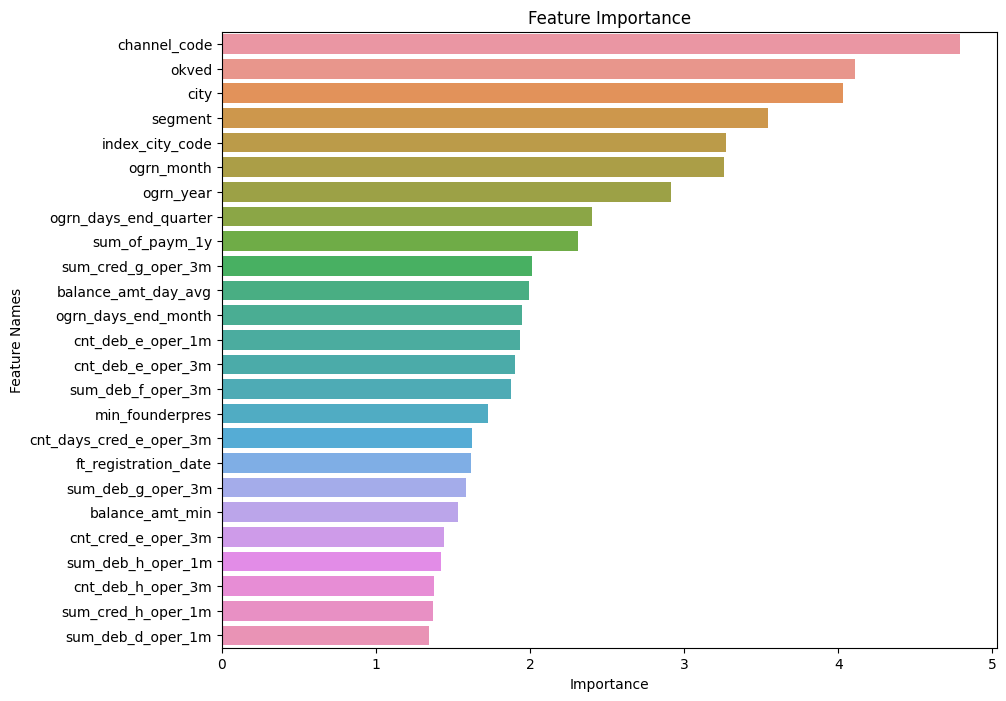

In [38]:
plot_importance(model_epsilon_churn)

In [39]:
# eta

In [40]:
target = 'churn_eta'

In [41]:
model_eta_churn, grouped_df = binary_model(train_df, list_product[5], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.279193
month_2    0.282723
month_3    0.296366
Name: churn_eta, dtype: float64
0:	test: 0.6802824	best: 0.6802824 (0)	total: 26.2ms	remaining: 21s
100:	test: 0.9397191	best: 0.9397191 (100)	total: 2.32s	remaining: 16s
200:	test: 0.9414165	best: 0.9414723 (197)	total: 4.7s	remaining: 14s
300:	test: 0.9445853	best: 0.9445874 (295)	total: 7.01s	remaining: 11.6s
400:	test: 0.9448583	best: 0.9449584 (363)	total: 9.33s	remaining: 9.28s
500:	test: 0.9451245	best: 0.9451245 (500)	total: 11.5s	remaining: 6.89s
600:	test: 0.9460798	best: 0.9460798 (600)	total: 13.7s	remaining: 4.55s
700:	test: 0.9467167	best: 0.9467167 (700)	total: 15.7s	remaining: 2.22s
799:	test: 0.9467786	best: 0.9468222 (789)	total: 17.7s	remaining: 0us

bestTest = 0.9468221788
bestIteration = 789

Shrink model to first 790 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


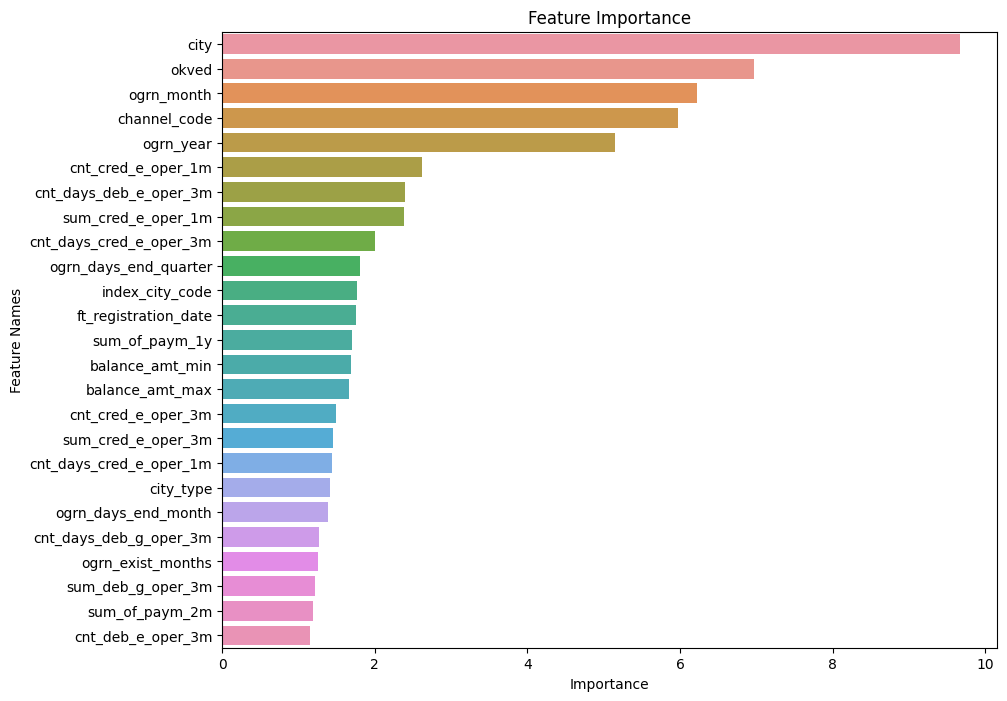

In [42]:
plot_importance(model_eta_churn)

In [43]:
# theta

In [44]:
target = 'churn_theta'

In [45]:
model_theta_churn, grouped_df = binary_model(train_df, list_product[6], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.400745
month_2    0.386506
month_3    0.382150
Name: churn_theta, dtype: float64
0:	test: 0.6214928	best: 0.6214928 (0)	total: 7.46ms	remaining: 5.96s
100:	test: 0.9289415	best: 0.9296302 (69)	total: 740ms	remaining: 5.12s
200:	test: 0.9332832	best: 0.9332832 (200)	total: 1.44s	remaining: 4.29s
300:	test: 0.9335903	best: 0.9341115 (225)	total: 2.2s	remaining: 3.65s
400:	test: 0.9346110	best: 0.9346296 (395)	total: 2.95s	remaining: 2.94s
500:	test: 0.9352656	best: 0.9353307 (495)	total: 3.8s	remaining: 2.27s
600:	test: 0.9365747	best: 0.9369780 (572)	total: 4.63s	remaining: 1.53s
700:	test: 0.9364413	best: 0.9369780 (572)	total: 5.49s	remaining: 776ms
799:	test: 0.9364631	best: 0.9370618 (752)	total: 6.28s	remaining: 0us

bestTest = 0.9370617981
bestIteration = 752

Shrink model to first 753 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


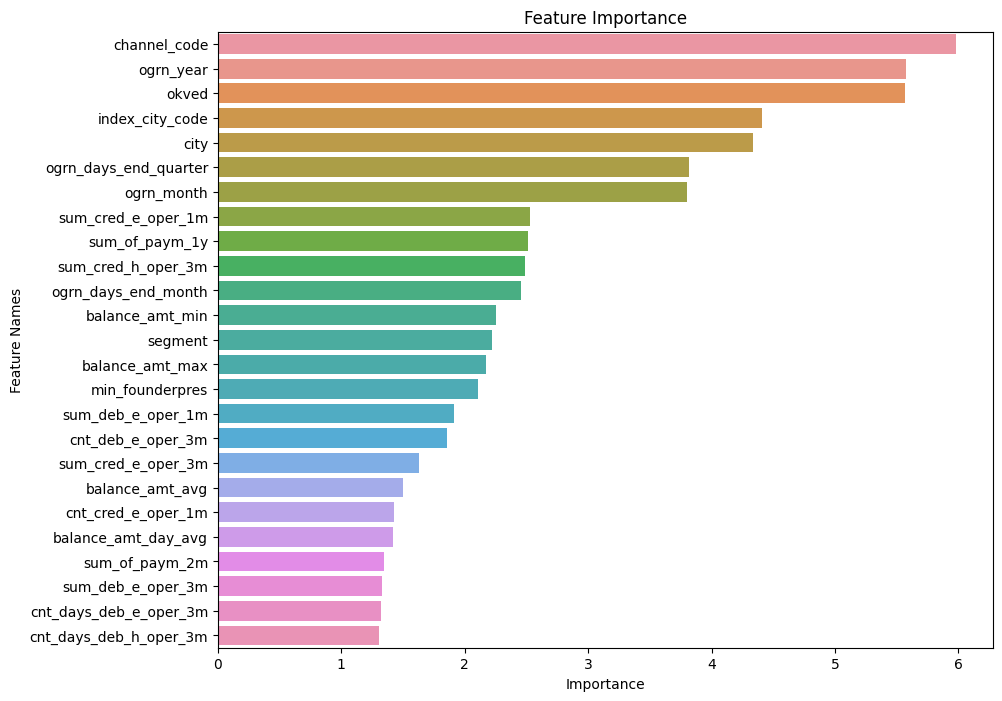

In [46]:
plot_importance(model_theta_churn)

In [47]:
# lambda

In [48]:
target = 'churn_lambda'

In [49]:
model_lambda_churn, grouped_df = binary_model(train_df, list_product[7], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.607547
month_2    0.600000
month_3    0.582090
Name: churn_lambda, dtype: float64
0:	test: 0.5749363	best: 0.5749363 (0)	total: 6.39ms	remaining: 5.11s
100:	test: 0.9424809	best: 0.9504673 (75)	total: 437ms	remaining: 3.02s
200:	test: 0.9462192	best: 0.9504673 (75)	total: 867ms	remaining: 2.58s
300:	test: 0.9469839	best: 0.9504673 (75)	total: 1.32s	remaining: 2.19s
400:	test: 0.9473237	best: 0.9504673 (75)	total: 1.84s	remaining: 1.83s
500:	test: 0.9481733	best: 0.9504673 (75)	total: 2.27s	remaining: 1.35s
600:	test: 0.9498726	best: 0.9504673 (75)	total: 2.7s	remaining: 895ms
700:	test: 0.9500425	best: 0.9504673 (75)	total: 3.13s	remaining: 442ms
799:	test: 0.9503823	best: 0.9508921 (776)	total: 3.57s	remaining: 0us

bestTest = 0.9508920986
bestIteration = 776

Shrink model to first 777 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


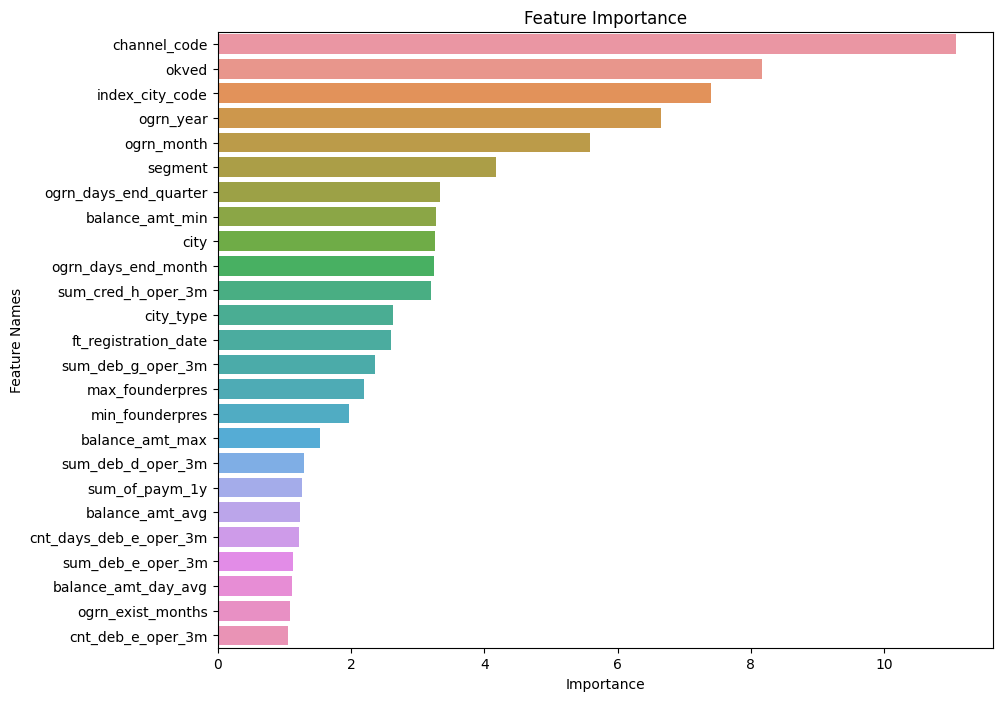

In [50]:
plot_importance(model_lambda_churn)

In [51]:
# mu

In [52]:
target = 'churn_mu'

In [53]:
model_mu_churn, grouped_df = binary_model(train_df, list_product[8], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.451852
month_2    0.486364
month_3    0.528226
Name: churn_mu, dtype: float64
0:	test: 0.6243641	best: 0.6243641 (0)	total: 5.8ms	remaining: 4.63s
100:	test: 0.9035612	best: 0.9035612 (100)	total: 484ms	remaining: 3.35s
200:	test: 0.9080403	best: 0.9083167 (192)	total: 927ms	remaining: 2.76s
300:	test: 0.9131829	best: 0.9134041 (241)	total: 1.33s	remaining: 2.2s
400:	test: 0.9152842	best: 0.9156713 (388)	total: 1.8s	remaining: 1.79s
500:	test: 0.9152842	best: 0.9159478 (462)	total: 2.21s	remaining: 1.32s
600:	test: 0.9155607	best: 0.9166667 (558)	total: 2.63s	remaining: 871ms
700:	test: 0.9161690	best: 0.9166667 (558)	total: 3.05s	remaining: 430ms
799:	test: 0.9161137	best: 0.9166667 (558)	total: 3.5s	remaining: 0us

bestTest = 0.9166666667
bestIteration = 558

Shrink model to first 559 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


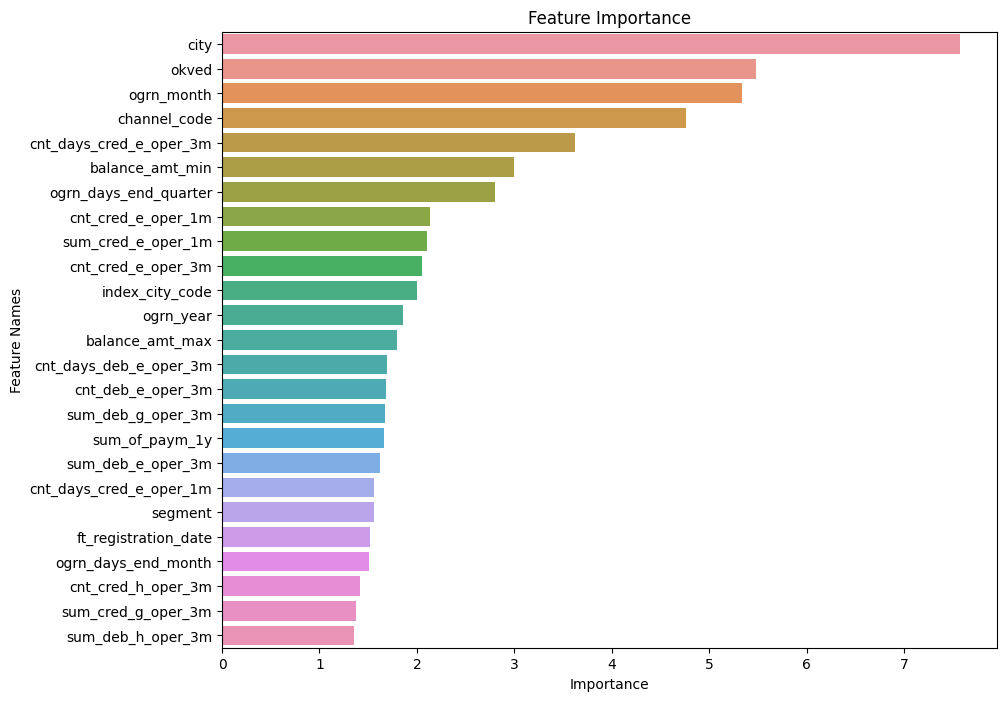

In [54]:
plot_importance(model_mu_churn)

In [55]:
# pi

In [56]:
target = 'churn_pi'

In [57]:
model_pi_churn, grouped_df = binary_model(train_df, list_product[9], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.750000
month_2    0.714286
month_3    0.666667
Name: churn_pi, dtype: float64
0:	test: 1.0000000	best: 1.0000000 (0)	total: 2.65ms	remaining: 2.12s
100:	test: 1.0000000	best: 1.0000000 (0)	total: 209ms	remaining: 1.44s
200:	test: 1.0000000	best: 1.0000000 (0)	total: 402ms	remaining: 1.2s
300:	test: 1.0000000	best: 1.0000000 (0)	total: 596ms	remaining: 988ms
400:	test: 1.0000000	best: 1.0000000 (0)	total: 831ms	remaining: 827ms
500:	test: 1.0000000	best: 1.0000000 (0)	total: 1.01s	remaining: 604ms
600:	test: 1.0000000	best: 1.0000000 (0)	total: 1.18s	remaining: 392ms
700:	test: 1.0000000	best: 1.0000000 (0)	total: 1.35s	remaining: 191ms
799:	test: 1.0000000	best: 1.0000000 (0)	total: 1.52s	remaining: 0us

bestTest = 1
bestIteration = 0

Shrink model to first 1 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


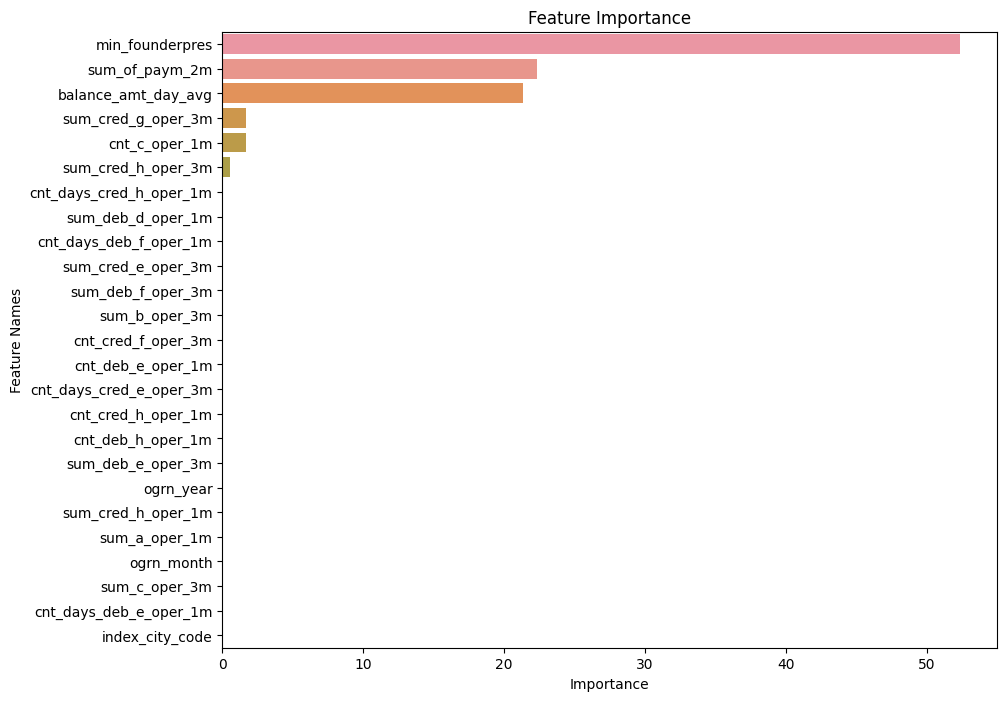

In [58]:
plot_importance(model_pi_churn)

In [59]:
# psi

In [60]:
target = 'churn_psi'

In [61]:
model_psi_churn, grouped_df = binary_model(train_df, list_product[10], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.406335
month_2    0.440509
month_3    0.468322
Name: churn_psi, dtype: float64
0:	test: 0.7292578	best: 0.7292578 (0)	total: 7.85ms	remaining: 6.28s
100:	test: 0.8788667	best: 0.8794267 (73)	total: 663ms	remaining: 4.59s
200:	test: 0.8813289	best: 0.8820933 (196)	total: 1.31s	remaining: 3.92s
300:	test: 0.8843956	best: 0.8854489 (278)	total: 1.96s	remaining: 3.24s
400:	test: 0.8858800	best: 0.8860311 (391)	total: 2.66s	remaining: 2.64s
500:	test: 0.8843733	best: 0.8860311 (391)	total: 3.32s	remaining: 1.98s
600:	test: 0.8846133	best: 0.8860311 (391)	total: 4.02s	remaining: 1.33s
700:	test: 0.8854578	best: 0.8860311 (391)	total: 4.64s	remaining: 656ms
799:	test: 0.8868089	best: 0.8868089 (799)	total: 5.21s	remaining: 0us

bestTest = 0.8868088889
bestIteration = 799



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


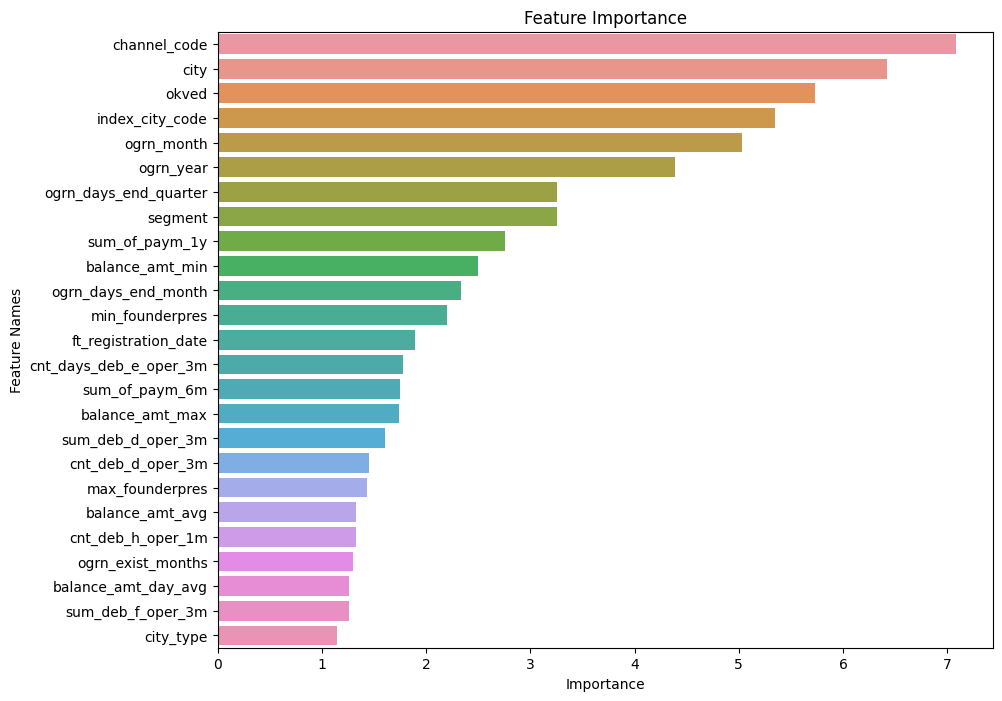

In [62]:
plot_importance(model_psi_churn)

In [63]:
# other

In [64]:
target = 'churn_other'

In [65]:
model_other_churn, grouped_df = binary_model(train_df, list_product[10], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
month_1    0.329603
month_2    0.326737
month_3    0.307872
Name: churn_other, dtype: float64
0:	test: 0.6448941	best: 0.6448941 (0)	total: 21.1ms	remaining: 16.9s
100:	test: 0.9349148	best: 0.9349148 (100)	total: 1.71s	remaining: 11.8s
200:	test: 0.9398862	best: 0.9398862 (200)	total: 3.53s	remaining: 10.5s
300:	test: 0.9402065	best: 0.9402065 (299)	total: 5.37s	remaining: 8.9s
400:	test: 0.9408565	best: 0.9408565 (400)	total: 7.13s	remaining: 7.1s
500:	test: 0.9411776	best: 0.9412285 (492)	total: 8.87s	remaining: 5.29s
600:	test: 0.9415143	best: 0.9415752 (597)	total: 10.6s	remaining: 3.51s
700:	test: 0.9413742	best: 0.9416984 (634)	total: 12.3s	remaining: 1.74s
799:	test: 0.9415448	best: 0.9416984 (634)	total: 14s	remaining: 0us

bestTest = 0.9416983927
bestIteration = 634

Shrink model to first 635 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


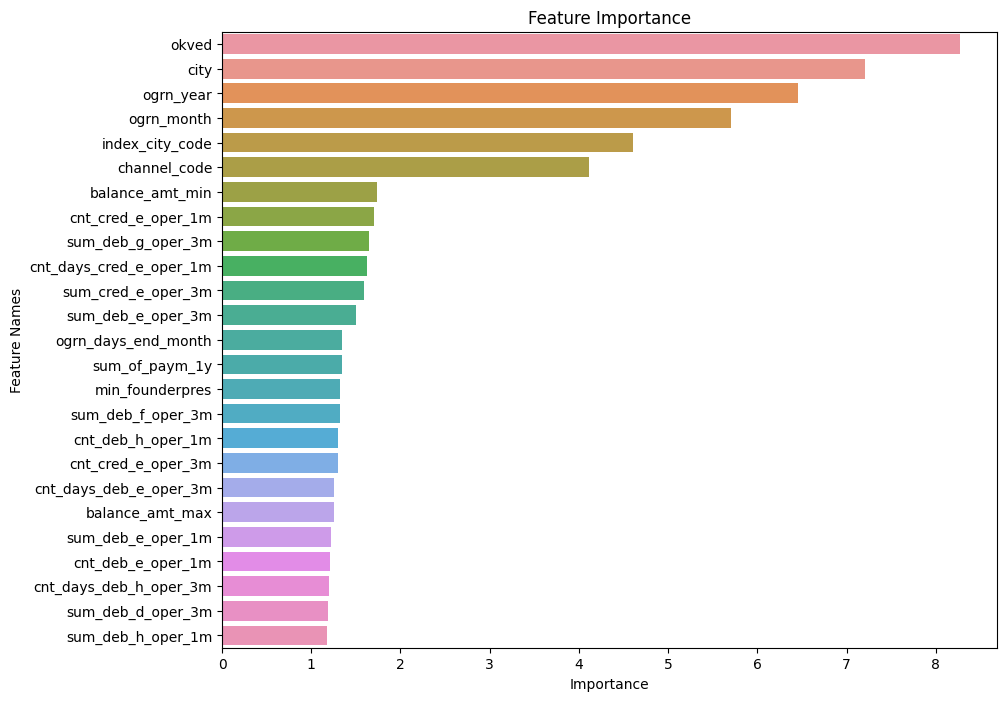

In [66]:
plot_importance(model_other_churn)

## Модели склонности прийти в продукт

In [69]:
# alpha

In [70]:
target = 'propensity_alpha'

In [71]:
model_alpha_propensity, grouped_df = binary_model_propensity(train_df, list_product[0], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.462396
month_2    0.398166
month_3    0.274017
Name: propensity_alpha, dtype: float64
0.3927903509960699
0:	test: 0.7184464	best: 0.7184464 (0)	total: 43.3ms	remaining: 34.6s
100:	test: 0.8675030	best: 0.8675030 (100)	total: 3.68s	remaining: 25.5s
200:	test: 0.8735824	best: 0.8735824 (200)	total: 7.35s	remaining: 21.9s
300:	test: 0.8763978	best: 0.8764107 (296)	total: 11.1s	remaining: 18.4s
400:	test: 0.8769548	best: 0.8769744 (399)	total: 14.8s	remaining: 14.7s
500:	test: 0.8775692	best: 0.8776271 (490)	total: 18.7s	remaining: 11.1s
600:	test: 0.8788124	best: 0.8789368 (598)	total: 22.9s	remaining: 7.57s
700:	test: 0.8798771	best: 0.8799854 (688)	total: 27s	remaining: 3.81s
799:	test: 0.8801158	best: 0.8803217 (732)	total: 31.2s	remaining: 0us

bestTest = 0.8803216946
bestIteration = 732

Shrink model to first 733 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
grouped_df

,date,clients,roc_auc
0,month_1,44557.0,0.872550
1,month_2,38283.0,0.936560
2,month_3,27845.0,0.978931


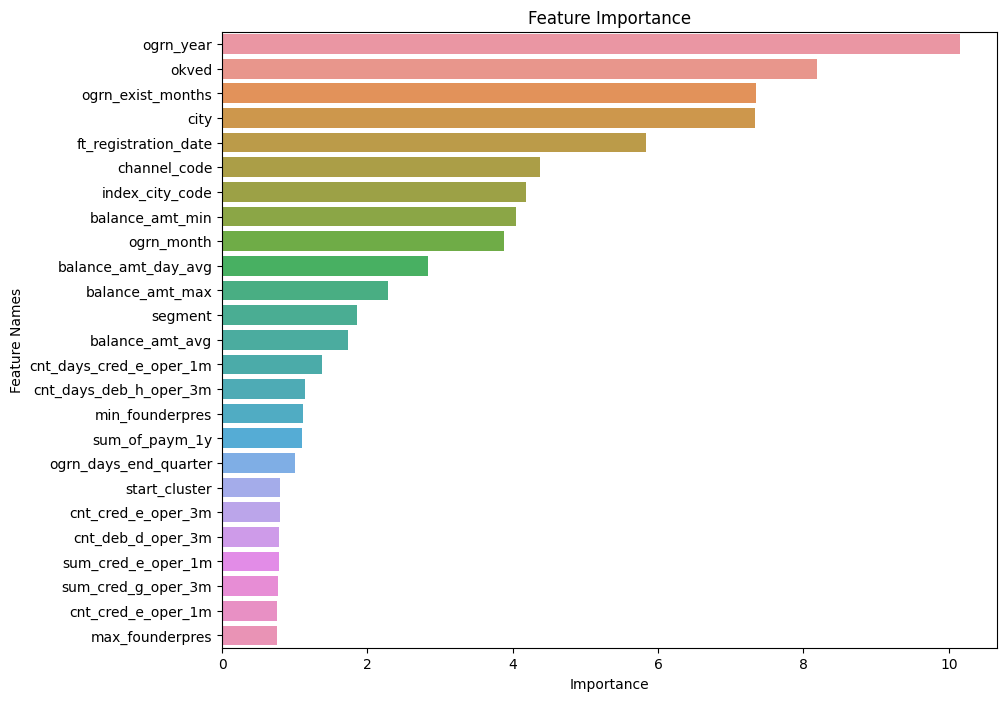

In [73]:
plot_importance(model_alpha_propensity)

In [74]:
# beta

In [75]:
target = 'propensity_beta'

In [76]:
model_beta_propensity, grouped_df = binary_model_propensity(train_df, list_product[1], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.011334
month_2    0.010890
month_3    0.010239
Name: propensity_beta, dtype: float64
0.010821326112337768
0:	test: 0.6281235	best: 0.6281235 (0)	total: 196ms	remaining: 2m 36s
100:	test: 0.9254257	best: 0.9254257 (100)	total: 18.5s	remaining: 2m 7s
200:	test: 0.9330978	best: 0.9331871 (185)	total: 36.5s	remaining: 1m 48s
300:	test: 0.9378258	best: 0.9378555 (299)	total: 54.9s	remaining: 1m 30s
400:	test: 0.9391987	best: 0.9392265 (395)	total: 1m 12s	remaining: 1m 12s
500:	test: 0.9411362	best: 0.9412788 (497)	total: 1m 30s	remaining: 54s
600:	test: 0.9414045	best: 0.9414045 (600)	total: 1m 48s	remaining: 35.8s
700:	test: 0.9418223	best: 0.9419364 (688)	total: 2m 5s	remaining: 17.8s
799:	test: 0.9427653	best: 0.9427818 (797)	total: 2m 23s	remaining: 0us

bestTest = 0.942781786
bestIteration = 797

Shrink model to first 798 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [77]:
grouped_df

,date,clients,roc_auc
0,month_1,196923.0,0.971093
1,month_2,196697.0,0.980857
2,month_3,196511.0,0.981712


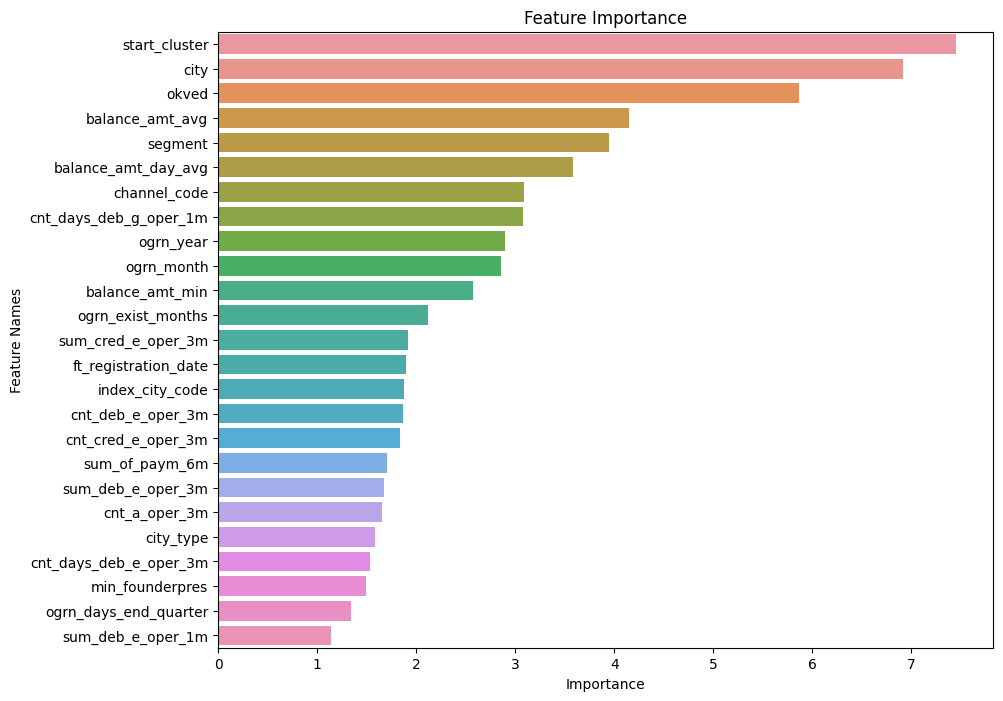

In [78]:
plot_importance(model_beta_propensity)

In [79]:
# gamma

In [80]:
target = 'propensity_gamma'

In [81]:
model_gamma_propensity, grouped_df = binary_model_propensity(train_df, list_product[2], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.026048
month_2    0.024615
month_3    0.022155
Name: propensity_gamma, dtype: float64
0.02427495989139825
0:	test: 0.5650296	best: 0.5650296 (0)	total: 181ms	remaining: 2m 24s
100:	test: 0.9437433	best: 0.9437433 (100)	total: 16.9s	remaining: 1m 56s
200:	test: 0.9500426	best: 0.9500426 (200)	total: 33.8s	remaining: 1m 40s
300:	test: 0.9526801	best: 0.9527599 (295)	total: 51.2s	remaining: 1m 24s
400:	test: 0.9542881	best: 0.9542992 (399)	total: 1m 8s	remaining: 1m 8s
500:	test: 0.9548995	best: 0.9549006 (499)	total: 1m 25s	remaining: 51.2s
600:	test: 0.9558549	best: 0.9558549 (600)	total: 1m 43s	remaining: 34.2s
700:	test: 0.9575198	best: 0.9575245 (696)	total: 2m	remaining: 17.1s
799:	test: 0.9584413	best: 0.9584413 (799)	total: 2m 18s	remaining: 0us

bestTest = 0.9584412852
bestIteration = 799



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [82]:
grouped_df

,date,clients,roc_auc
0,month_1,189340.0,0.977537
1,month_2,189150.0,0.987114
2,month_3,188720.0,0.985915


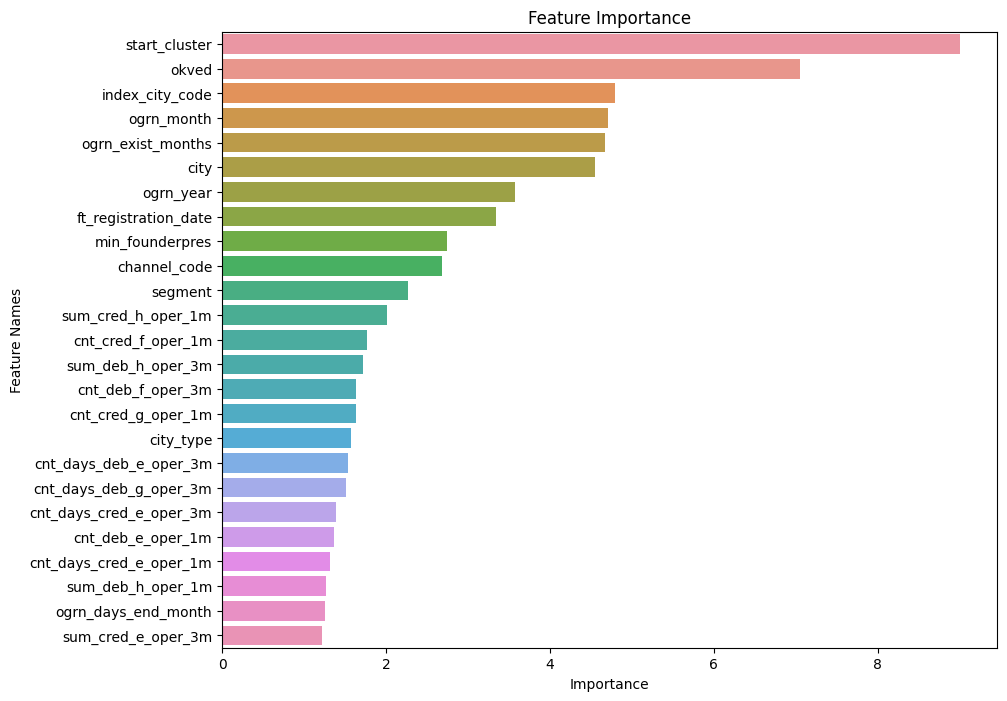

In [83]:
plot_importance(model_gamma_propensity)

In [84]:
# sigma

In [85]:
target = 'propensity_sigma'

In [86]:
model_sigma_propensity, grouped_df = binary_model_propensity(train_df, list_product[3], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.002988
month_2    0.002946
month_3    0.005600
Name: propensity_sigma, dtype: float64
0.0038447037261840553
0:	test: 0.5848700	best: 0.5848700 (0)	total: 185ms	remaining: 2m 28s
100:	test: 0.9014498	best: 0.9014498 (100)	total: 17.2s	remaining: 1m 58s
200:	test: 0.9074172	best: 0.9074172 (200)	total: 35s	remaining: 1m 44s
300:	test: 0.9095109	best: 0.9095109 (300)	total: 52.5s	remaining: 1m 27s
400:	test: 0.9111114	best: 0.9111231 (399)	total: 1m 10s	remaining: 1m 10s
500:	test: 0.9115627	best: 0.9117144 (444)	total: 1m 28s	remaining: 52.8s
600:	test: 0.9119213	best: 0.9121290 (567)	total: 1m 46s	remaining: 35.4s
700:	test: 0.9119121	best: 0.9126478 (641)	total: 2m 4s	remaining: 17.6s
799:	test: 0.9115427	best: 0.9126478 (641)	total: 2m 22s	remaining: 0us

bestTest = 0.9126478432
bestIteration = 641

Shrink model to first 642 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [87]:
grouped_df

,date,clients,roc_auc
0,month_1,197138.0,0.947921
1,month_2,197194.0,0.974076
2,month_3,197131.0,0.972413


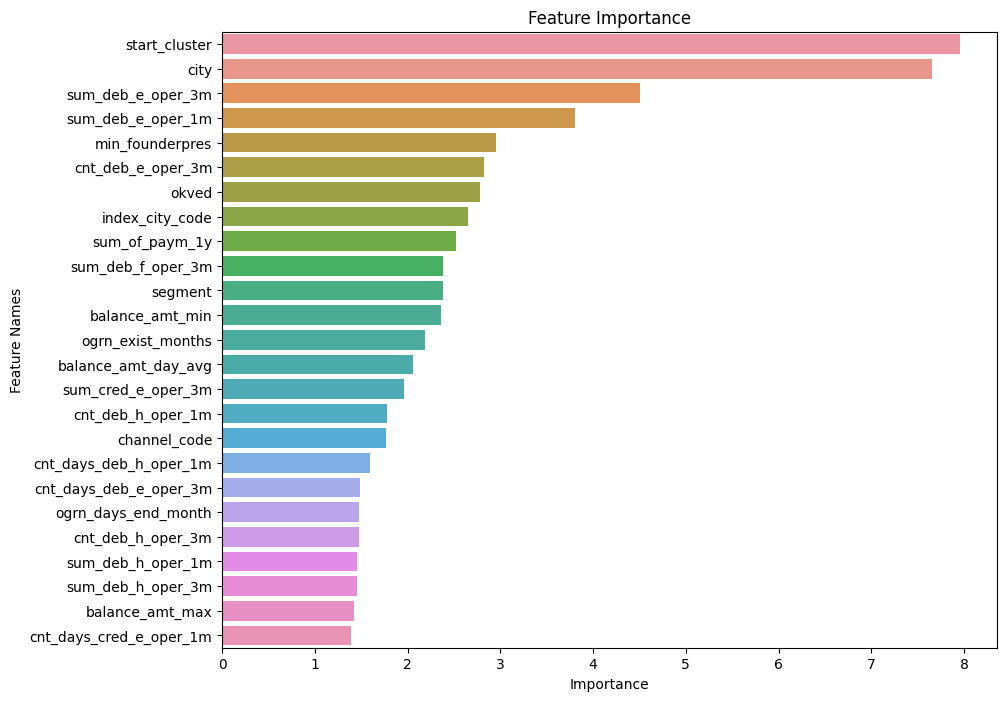

In [88]:
plot_importance(model_sigma_propensity)

In [89]:
# epsilon

In [90]:
target = 'propensity_epsilon'

In [91]:
model_epsilon_propensity, grouped_df = binary_model_propensity(train_df, list_product[4], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.008186
month_2    0.008312
month_3    0.007979
Name: propensity_epsilon, dtype: float64
0.008159195572267523
0:	test: 0.6292157	best: 0.6292157 (0)	total: 203ms	remaining: 2m 41s
100:	test: 0.9253891	best: 0.9253891 (100)	total: 16.7s	remaining: 1m 55s
200:	test: 0.9358924	best: 0.9358924 (200)	total: 34.2s	remaining: 1m 41s
300:	test: 0.9400795	best: 0.9400795 (300)	total: 52s	remaining: 1m 26s
400:	test: 0.9413837	best: 0.9414257 (372)	total: 1m 9s	remaining: 1m 8s
500:	test: 0.9410695	best: 0.9415275 (487)	total: 1m 26s	remaining: 51.7s
600:	test: 0.9417203	best: 0.9417613 (598)	total: 1m 44s	remaining: 34.7s
700:	test: 0.9421665	best: 0.9422408 (699)	total: 2m 2s	remaining: 17.3s
799:	test: 0.9423055	best: 0.9423818 (775)	total: 2m 19s	remaining: 0us

bestTest = 0.942381769
bestIteration = 775

Shrink model to first 776 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [92]:
grouped_df

,date,clients,roc_auc
0,month_1,197289.0,0.969113
1,month_2,197294.0,0.982004
2,month_3,197142.0,0.982980


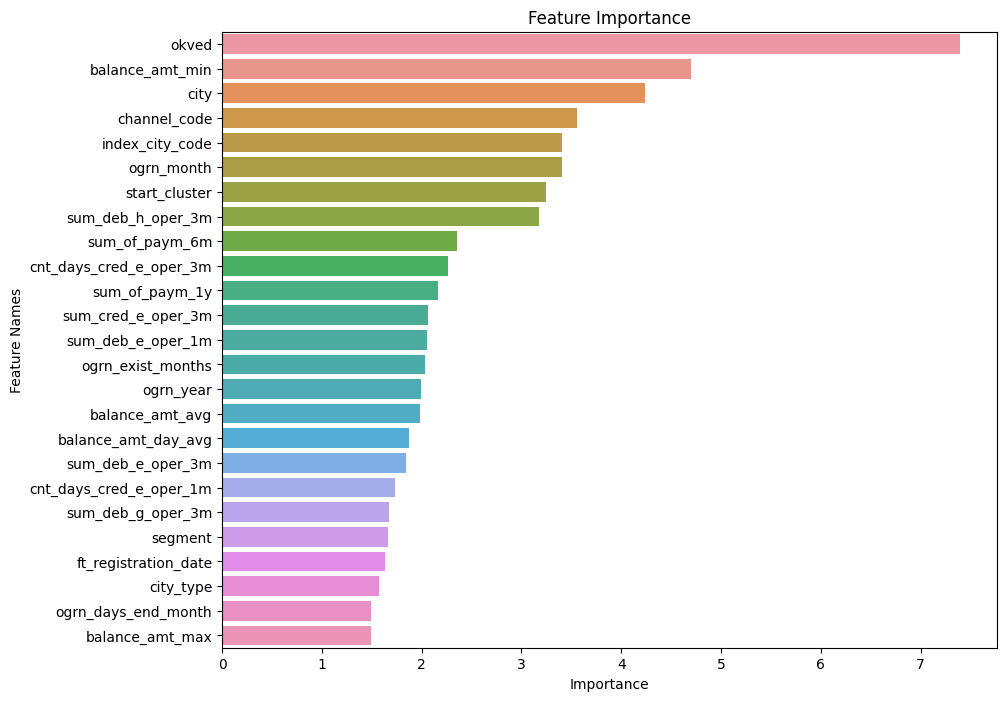

In [93]:
plot_importance(model_epsilon_propensity)

In [94]:
# eta

In [95]:
target = 'propensity_eta'

In [96]:
model_eta_propensity, grouped_df = binary_model_propensity(train_df, list_product[5], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.023412
month_2    0.019136
month_3    0.013359
Name: propensity_eta, dtype: float64
0.018649690343064206
0:	test: 0.6462207	best: 0.6462207 (0)	total: 148ms	remaining: 1m 58s
100:	test: 0.9429133	best: 0.9429133 (100)	total: 16.5s	remaining: 1m 54s
200:	test: 0.9458949	best: 0.9459308 (196)	total: 32.7s	remaining: 1m 37s
300:	test: 0.9491109	best: 0.9491109 (300)	total: 49.2s	remaining: 1m 21s
400:	test: 0.9523703	best: 0.9523720 (399)	total: 1m 5s	remaining: 1m 5s
500:	test: 0.9543930	best: 0.9544350 (497)	total: 1m 22s	remaining: 49s
600:	test: 0.9551107	best: 0.9551150 (599)	total: 1m 39s	remaining: 32.8s
700:	test: 0.9555781	best: 0.9556861 (679)	total: 1m 56s	remaining: 16.4s
799:	test: 0.9556550	best: 0.9556861 (679)	total: 2m 13s	remaining: 0us

bestTest = 0.9556861303
bestIteration = 679

Shrink model to first 680 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
grouped_df 

,date,clients,roc_auc
0,month_1,185673.0,0.963415
1,month_2,185148.0,0.981406
2,month_3,184148.0,0.988771


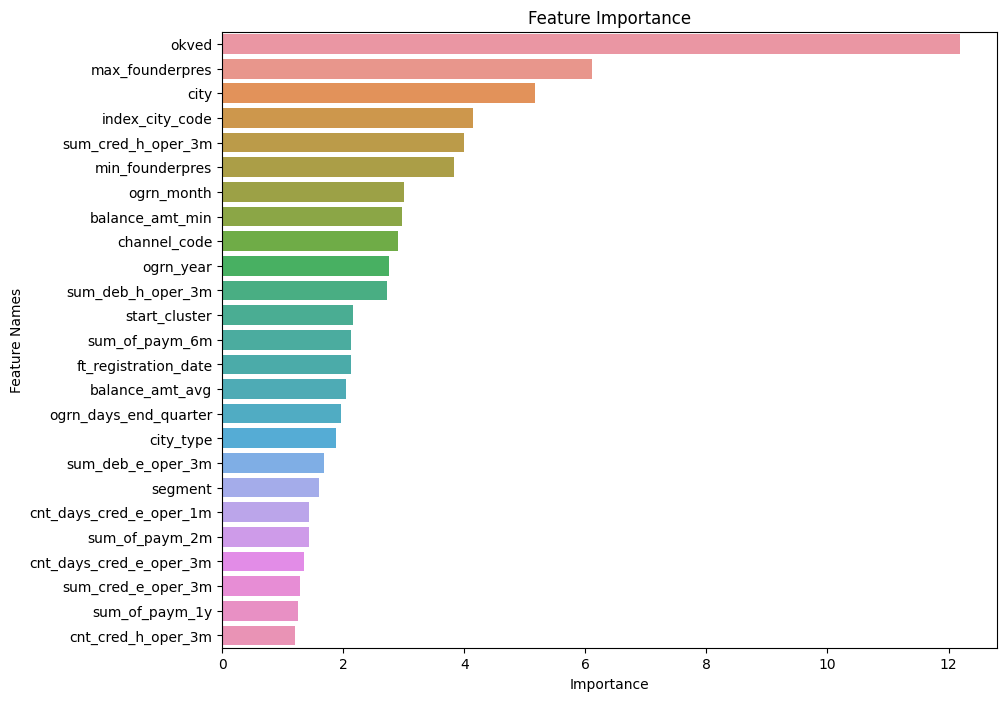

In [98]:
plot_importance(model_eta_propensity)

In [99]:
# theta

In [100]:
target = 'propensity_theta'

In [101]:
model_theta_propensity, grouped_df = binary_model_propensity(train_df, list_product[6], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.007036
month_2    0.007068
month_3    0.006516
Name: propensity_theta, dtype: float64
0.006873326477958737
0:	test: 0.4989331	best: 0.4989331 (0)	total: 110ms	remaining: 1m 27s
100:	test: 0.9364863	best: 0.9364863 (100)	total: 17.3s	remaining: 1m 59s
200:	test: 0.9486083	best: 0.9486204 (191)	total: 35.1s	remaining: 1m 44s
300:	test: 0.9505449	best: 0.9506769 (294)	total: 52.2s	remaining: 1m 26s
400:	test: 0.9511973	best: 0.9515214 (334)	total: 1m 9s	remaining: 1m 9s
500:	test: 0.9513006	best: 0.9515914 (440)	total: 1m 26s	remaining: 51.8s
600:	test: 0.9510795	best: 0.9515914 (440)	total: 1m 44s	remaining: 34.6s
700:	test: 0.9516652	best: 0.9517458 (693)	total: 2m 2s	remaining: 17.3s
799:	test: 0.9512631	best: 0.9517458 (693)	total: 2m 19s	remaining: 0us

bestTest = 0.9517457504
bestIteration = 693

Shrink model to first 694 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [102]:
grouped_df 

,date,clients,roc_auc
0,month_1,198121.0,0.977455
1,month_2,198088.0,0.986150
2,month_3,197972.0,0.984168


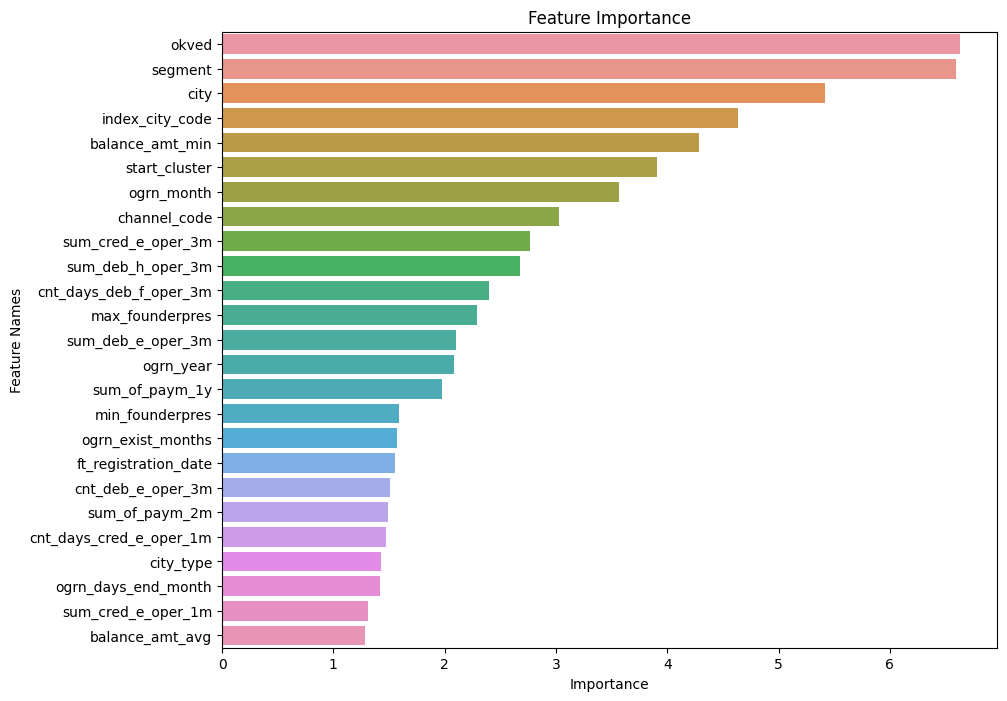

In [103]:
plot_importance(model_theta_propensity)

In [104]:
# lambda

In [105]:
target = 'propensity_lambda'

In [106]:
model_lambda_propensity, grouped_df = binary_model_propensity(train_df, list_product[7], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.001106
month_2    0.001182
month_3    0.001152
Name: propensity_lambda, dtype: float64
0.0011465440126036395
0:	test: 0.5754863	best: 0.5754863 (0)	total: 149ms	remaining: 1m 59s
100:	test: 0.9365132	best: 0.9365680 (99)	total: 15.9s	remaining: 1m 50s
200:	test: 0.9421927	best: 0.9426081 (198)	total: 32.8s	remaining: 1m 37s
300:	test: 0.9499129	best: 0.9508037 (280)	total: 50.4s	remaining: 1m 23s
400:	test: 0.9483368	best: 0.9516525 (329)	total: 1m 8s	remaining: 1m 7s
500:	test: 0.9477604	best: 0.9516525 (329)	total: 1m 25s	remaining: 51.1s
600:	test: 0.9486122	best: 0.9516525 (329)	total: 1m 43s	remaining: 34.2s
700:	test: 0.9469190	best: 0.9516525 (329)	total: 2m	remaining: 17s
799:	test: 0.9455226	best: 0.9516525 (329)	total: 2m 17s	remaining: 0us

bestTest = 0.9516525197
bestIteration = 329

Shrink model to first 330 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [107]:
grouped_df 

,date,clients,roc_auc
0,month_1,199735.0,0.972746
1,month_2,199725.0,0.973138
2,month_3,199732.0,0.981612


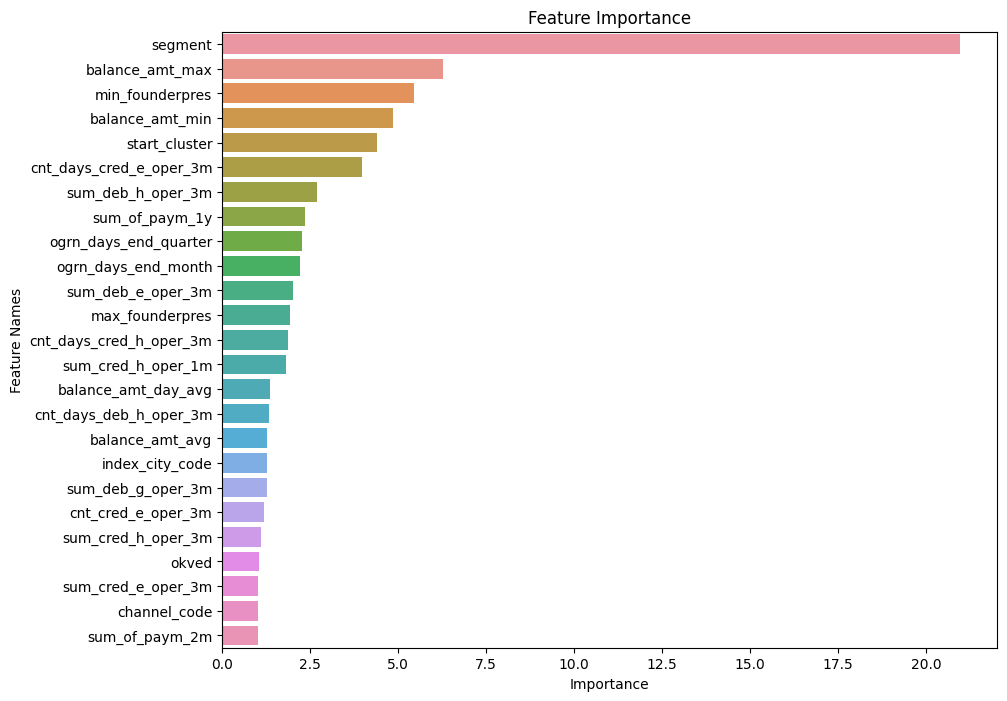

In [108]:
plot_importance(model_lambda_propensity)

In [109]:
# mu

In [110]:
target = 'propensity_mu'

In [111]:
model_mu_propensity, grouped_df = binary_model_propensity(train_df, list_product[8], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.002320
month_2    0.002485
month_3    0.002416
Name: propensity_mu, dtype: float64
0.002407046415405097
0:	test: 0.5833694	best: 0.5833694 (0)	total: 201ms	remaining: 2m 40s
100:	test: 0.9045516	best: 0.9049609 (89)	total: 17.1s	remaining: 1m 58s
200:	test: 0.9141835	best: 0.9142819 (197)	total: 34.5s	remaining: 1m 42s
300:	test: 0.9168049	best: 0.9175329 (294)	total: 52.8s	remaining: 1m 27s
400:	test: 0.9162477	best: 0.9175329 (294)	total: 1m 11s	remaining: 1m 10s
500:	test: 0.9187776	best: 0.9189867 (496)	total: 1m 28s	remaining: 53.1s
600:	test: 0.9186908	best: 0.9189867 (496)	total: 1m 47s	remaining: 35.5s
700:	test: 0.9189376	best: 0.9191918 (635)	total: 2m 5s	remaining: 17.7s
799:	test: 0.9189168	best: 0.9191918 (635)	total: 2m 23s	remaining: 0us

bestTest = 0.9191917794
bestIteration = 635

Shrink model to first 636 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
grouped_df

,date,clients,roc_auc
0,month_1,199595.0,0.966247
1,month_2,199560.0,0.978420
2,month_3,199504.0,0.977121


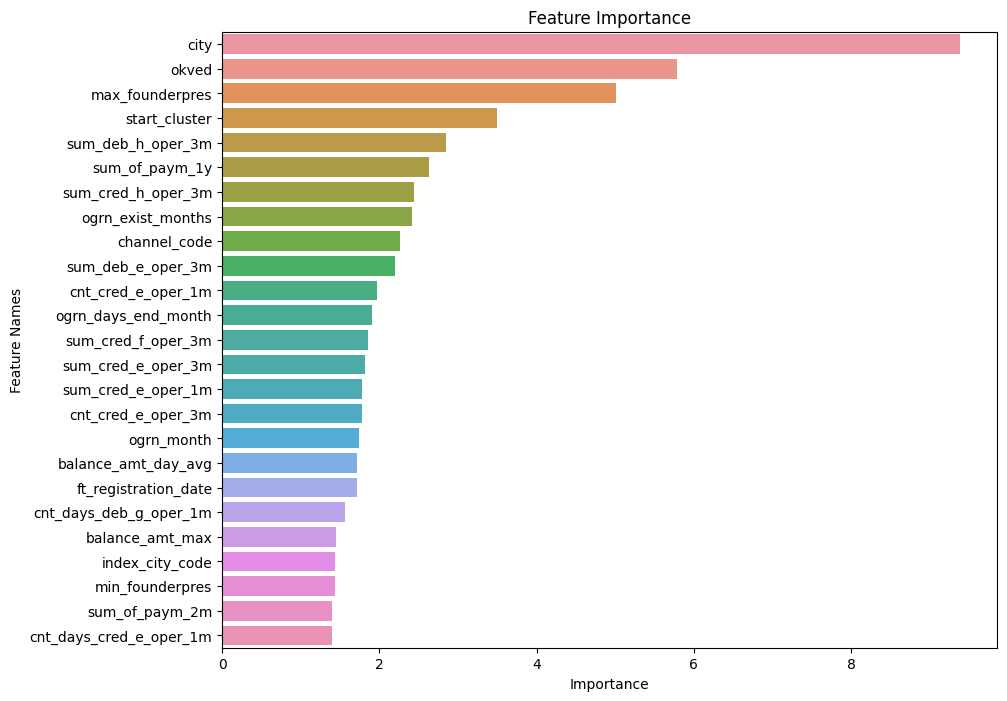

In [113]:
plot_importance(model_mu_propensity)

In [114]:
# pi

In [115]:
target = 'propensity_pi'

In [116]:
model_pi_propensity, grouped_df = binary_model_propensity(train_df, list_product[9], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.000020
month_2    0.000025
month_3    0.000015
Name: propensity_pi, dtype: float64
2.0000833368057002e-05
0:	test: 0.4586854	best: 0.4586854 (0)	total: 199ms	remaining: 2m 39s
100:	test: 0.9997417	best: 0.9997500 (82)	total: 17.6s	remaining: 2m 1s
200:	test: 0.9999667	best: 0.9999750 (131)	total: 34.5s	remaining: 1m 42s
300:	test: 0.9999667	best: 0.9999750 (131)	total: 51.6s	remaining: 1m 25s
400:	test: 0.9999667	best: 0.9999750 (131)	total: 1m 8s	remaining: 1m 8s
500:	test: 0.9999667	best: 0.9999750 (131)	total: 1m 25s	remaining: 51.3s
600:	test: 0.9999750	best: 0.9999750 (131)	total: 1m 42s	remaining: 34.1s
700:	test: 0.9999833	best: 0.9999833 (646)	total: 1m 59s	remaining: 16.9s
799:	test: 0.9999750	best: 0.9999833 (646)	total: 2m 16s	remaining: 0us

bestTest = 0.9999833325
bestIteration = 646

Shrink model to first 647 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [117]:
grouped_df

,date,clients,roc_auc
0,month_1,199988.0,0.999994
1,month_2,199993.0,1.000000
2,month_3,199994.0,1.000000


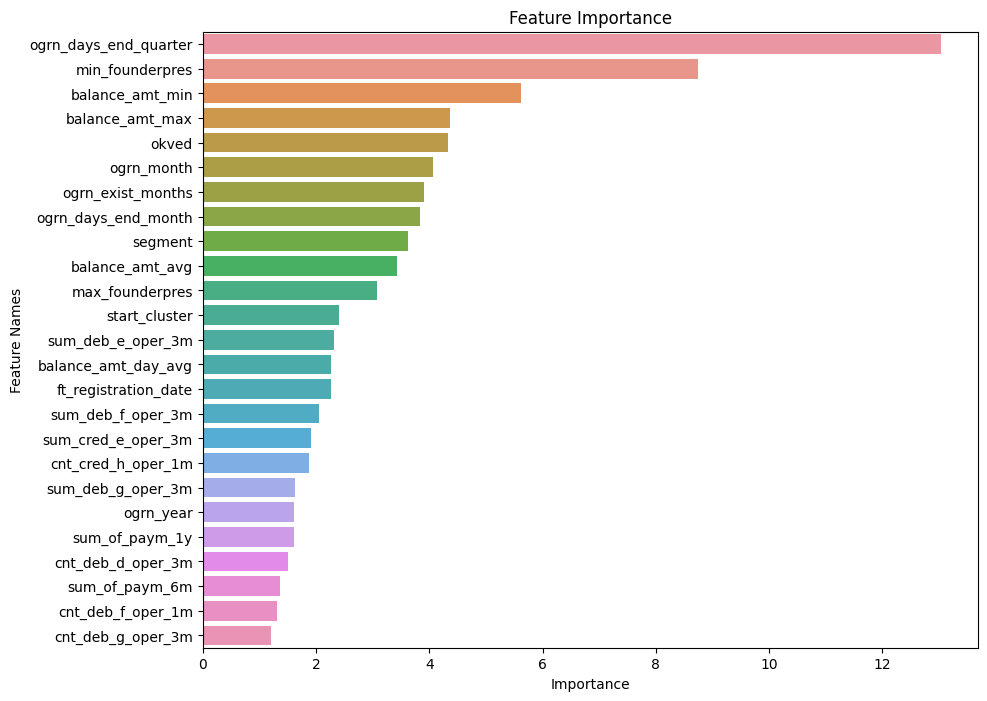

In [118]:
plot_importance(model_pi_propensity)

In [119]:
# psi

In [120]:
target = 'propensity_psi'

In [121]:
model_psi_propensity, grouped_df = binary_model_propensity(train_df, list_product[10], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.002544
month_2    0.002388
month_3    0.002092
Name: propensity_psi, dtype: float64
0.0023415003704163077
0:	test: 0.6699453	best: 0.6699453 (0)	total: 186ms	remaining: 2m 28s
100:	test: 0.9511669	best: 0.9512822 (99)	total: 17.3s	remaining: 2m
200:	test: 0.9585698	best: 0.9585888 (198)	total: 34.7s	remaining: 1m 43s
300:	test: 0.9601928	best: 0.9605277 (295)	total: 52.3s	remaining: 1m 26s
400:	test: 0.9616541	best: 0.9618126 (367)	total: 1m 10s	remaining: 1m 9s
500:	test: 0.9619607	best: 0.9620115 (493)	total: 1m 28s	remaining: 52.6s
600:	test: 0.9614277	best: 0.9626704 (580)	total: 1m 45s	remaining: 35.1s
700:	test: 0.9620930	best: 0.9626704 (580)	total: 2m 3s	remaining: 17.5s
799:	test: 0.9611666	best: 0.9626704 (580)	total: 2m 21s	remaining: 0us

bestTest = 0.9626703664
bestIteration = 580

Shrink model to first 581 iterations.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [122]:
grouped_df

,date,clients,roc_auc
0,month_1,198895.0,0.976321
1,month_2,198899.0,0.985846
2,month_3,198832.0,0.987901


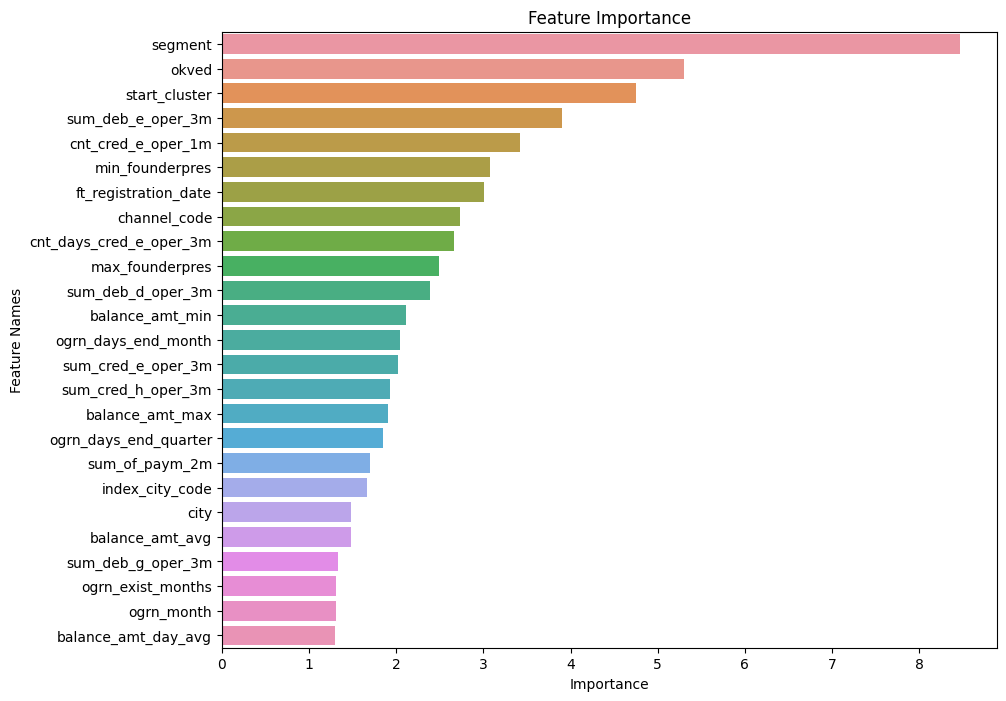

In [123]:
plot_importance(model_psi_propensity)

In [124]:
# other

In [125]:
target = 'propensity_other'

In [126]:
model_other_propensity, grouped_df = binary_model_propensity(train_df, list_product[11], target, features, cat_cols)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


date
month_1    0.043712
month_2    0.044104
month_3    0.047345
Name: propensity_other, dtype: float64
0.04505030914118063
0:	test: 0.7537013	best: 0.7537013 (0)	total: 191ms	remaining: 2m 32s
100:	test: 0.9358379	best: 0.9358379 (100)	total: 17.2s	remaining: 1m 59s
200:	test: 0.9401319	best: 0.9401319 (200)	total: 34.2s	remaining: 1m 41s
300:	test: 0.9417043	best: 0.9417043 (300)	total: 51.1s	remaining: 1m 24s
400:	test: 0.9427260	best: 0.9427294 (398)	total: 1m 8s	remaining: 1m 7s
500:	test: 0.9437853	best: 0.9438212 (492)	total: 1m 25s	remaining: 51.2s
600:	test: 0.9450420	best: 0.9450864 (593)	total: 1m 43s	remaining: 34.2s
700:	test: 0.9453940	best: 0.9453981 (693)	total: 2m	remaining: 17s
799:	test: 0.9459089	best: 0.9459089 (799)	total: 2m 17s	remaining: 0us

bestTest = 0.9459088828
bestIteration = 799



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [127]:
grouped_df

,date,clients,roc_auc
0,month_1,189903.0,0.968012
1,month_2,189438.0,0.979903
2,month_3,188846.0,0.979501


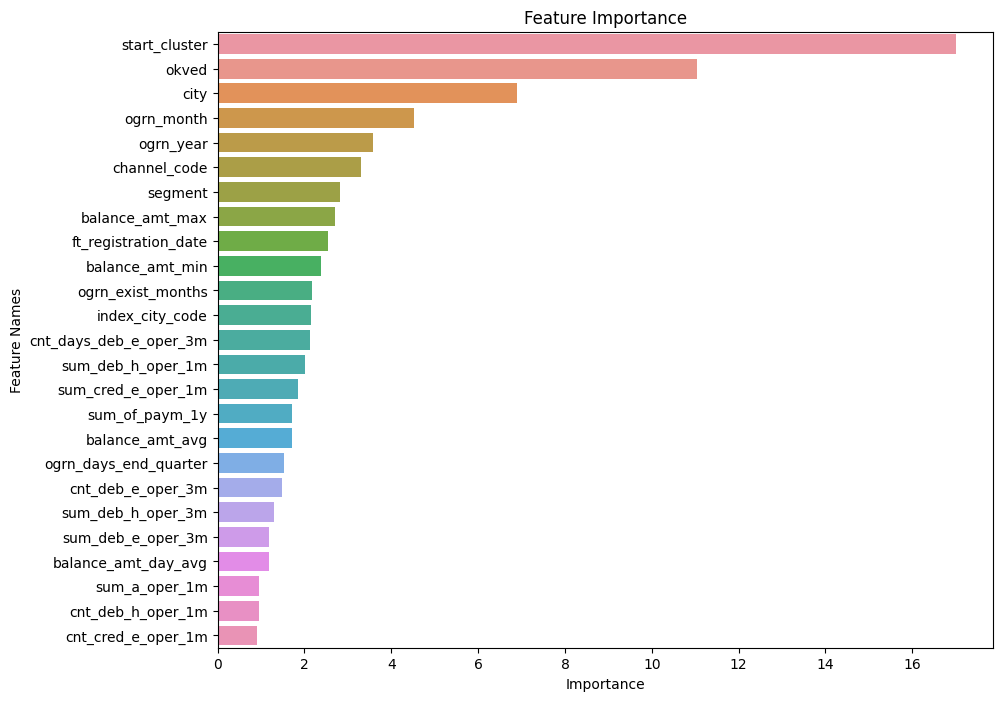

In [128]:
plot_importance(model_other_propensity)

## Скорим моделями оттока и склонности всех клиентов

In [238]:
def predict_models_churn_propensity(df):

    df['α_churn'] = model_alpha_churn.predict_proba(df[features])[:,1]
    df['β_churn'] = model_beta_churn.predict_proba(df[features])[:,1]
    df['γ_churn'] = model_gamma_churn.predict_proba(df[features])[:,1]
    df['δ_churn'] = model_sigma_churn.predict_proba(df[features])[:,1]
    df['ε_churn'] = model_epsilon_churn.predict_proba(df[features])[:,1]
    df['η_churn'] = model_eta_churn.predict_proba(df[features])[:,1]
    df['θ_churn'] = model_theta_churn.predict_proba(df[features])[:,1]
    df['λ_churn'] = model_lambda_churn.predict_proba(df[features])[:,1]
    df['μ_churn'] = model_mu_churn.predict_proba(df[features])[:,1]
    df['π_churn'] = model_pi_churn.predict_proba(df[features])[:,1]
    df['ψ_churn'] = model_psi_churn.predict_proba(df[features])[:,1]
    df['other_churn'] = model_other_churn.predict_proba(df[features])[:,1]
    
    df['α_propensity'] = model_alpha_propensity.predict_proba(df[features])[:,1]
    df['β_propensity'] = model_beta_propensity.predict_proba(df[features])[:,1]
    df['γ_propensity'] = model_gamma_propensity.predict_proba(df[features])[:,1]
    df['δ_propensity'] = model_sigma_propensity.predict_proba(df[features])[:,1]
    df['ε_propensity'] = model_epsilon_propensity.predict_proba(df[features])[:,1]
    df['η_propensity'] = model_eta_propensity.predict_proba(df[features])[:,1]
    df['θ_propensity'] = model_theta_propensity.predict_proba(df[features])[:,1]
    df['λ_propensity'] = model_lambda_propensity.predict_proba(df[features])[:,1]
    df['μ_propensity'] = model_mu_propensity.predict_proba(df[features])[:,1]
    df['π_propensity'] = model_pi_propensity.predict_proba(df[features])[:,1]
    df['ψ_propensity'] = model_psi_propensity.predict_proba(df[features])[:,1]
    df['other_propensity'] = model_other_propensity.predict_proba(df[features])[:,1]
    
    return df

In [237]:
def get_predictions(df, list_product):
    for start_segment in start_segments:
        for end_segment in end_segments:
            prob = 1
            for product in list_product:
                if (product in start_segment) & (product in end_segment):
                    prob *= (1 - df[f'{product}_churn'])

                if (product in start_segment) & (product not in end_segment):
                    prob *= df[f'{product}_churn']

                if (product not in start_segment) & (product in end_segment):
                    prob *= df[f'{product}_propensity']

                if (product not in start_segment) & (product not in end_segment):
                    prob *= (1-df[f'{product}_propensity'])

            df.loc[df['start_cluster'] == start_segment, f'{end_segment}'] = prob
            
    return df


def get_roc_auc_score(val_df):
    labels = list(sample_submission_df.columns[1:])
    unnorm_weights = np.array([weights_dict[label] for label in labels])
    weights = unnorm_weights / unnorm_weights.sum()

    auc_scores = {}
    for label in labels:
        auc_scores[label] = roc_auc_score((val_df['end_cluster'] == label).astype(int), val_df[label])


    weighted_auc_scores = {}
    for label, auc_score in auc_scores.items():
        weighted_auc_scores[label] = auc_score * weights[list(labels).index(label)]


    weighted_auc_sum = sum(weighted_auc_scores.values())
    print(weighted_auc_sum)
    
    return weighted_auc_sum

cluster_weights = pd.read_excel("cluster_weights.xlsx").set_index("cluster")
weights_dict = cluster_weights["unnorm_weight"].to_dict()
sample_submission_df = pd.read_csv("sample_submission.csv")

In [242]:
train_df = predict_models_churn_propensity(train_df)
train_df = get_predictions(train_df, list_product)
train_df['sum_proba'] = train_df[sample_submission_df.columns[1:]].sum(axis=1)
train_df['{other}'] = 1 - train_df['sum_proba']

In [254]:
get_roc_auc_score(train_df)

0.987769449722655


## For submit

In [228]:
test_df['start_cluster'] = test_df['start_cluster'].fillna(method='ffill')
test_df

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.096224,0.335496,-0.125995,-0.095578,channel_code_12,city_14,city_type_0,None,...,0.010952,0.946066,0.407762,-0.153950,0.548895,0.541020,0.031742,0.257278,0.561353,{α}
1,200000,month_5,-0.024255,-0.059806,-0.124295,-0.023381,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.150505,0.549468,0.552131,0.237817,0.264211,0.715199,{α}
2,200000,month_6,0.045988,0.049418,-0.125995,0.047079,channel_code_12,city_14,city_type_0,None,...,0.006812,0.945281,0.396267,-0.152800,0.549468,0.541020,0.387566,0.268543,0.836079,None
3,200001,month_4,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
4,200001,month_5,-0.156722,-0.204920,-0.125856,-0.156258,channel_code_9,city_76,city_type_0,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{α}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290115,299998,month_5,NaN,NaN,NaN,NaN,None,None,None,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{}
290116,299998,month_6,-0.155350,-0.203711,-0.125995,-0.155980,channel_code_9,city_25,city_type_0,index_city_code_30,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540,None
290117,299999,month_4,-0.145899,-0.173298,-0.125995,-0.145402,channel_code_9,city_6,city_type_0,index_city_code_34,...,-0.028584,0.944497,0.384773,-0.097640,0.550901,0.574354,-0.101369,0.252657,0.440474,{α}
290118,299999,month_5,-0.136402,-0.163874,-0.121475,-0.135876,channel_code_9,city_6,city_type_0,index_city_code_34,...,-0.028584,0.944497,0.384773,-0.047885,0.555057,0.696576,-0.034860,0.253523,0.473441,{α}


In [ ]:
test_df = predict_models_churn_propensity(test_df)
test_df = get_predictions(test_df, list_product)
test_df['sum_proba'] = test_df[sample_submission_df.columns[1:]].sum(axis=1)
test_df['{other}'] = 1 - test_df['sum_proba']

## To csv

In [211]:
test_df[test_df['date'] == 'month_6'][sample_submission_df.columns].to_csv('submit_alfa_new_17_38.csv',index=False)